In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
df = pd.read_csv('2015.csv')
b = pd.read_csv('2016.csv')
c = pd.read_csv('2017.csv')
d = pd.read_csv('2018.csv')
e= pd.read_csv('2019.csv')


# Problem tanımı ve amaç: Bu veri seti ilk kez 2012 yılında yayınlanan 155 ülkeyi mutluluk seviyelerine göre sıralayan dünya mutluluk raporlarından oluşmaktadır.

# Mutluluk seviyelerini belirlemek için 6 faktör -ekonomik üretim, sosyal destek, yaşam beklentisi, özgürlük, yolsuzluğun olmaması ve cömertlik - göz önüne alınmaktadır. Amaç günümüz dünyasında daha mutlu toplumlar oluşmasına katkı sağlamak için aşağıdaki gibi sorulara cevaplar arayabilmektir.

# Hangi ülkeler veya bölgeler genel mutlulukta ve mutluluğa katkıda bulunan altı faktörün her birinde en yüksek sırada yer alıyor?


# 2015-2016 ile 2016-2017 raporları arasında ülke sıralamaları veya puanları nasıl değişti?Herhangi bir ülke mutlulukta önemli bir artış veya azalma yaşadı mı?


In [104]:
df.columns = df.columns.str.replace(' ','_')

In [105]:
df.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [106]:
df.info()
#Eksik veri yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness_Rank                 158 non-null    int64  
 3   Happiness_Score                158 non-null    float64
 4   Standard_Error                 158 non-null    float64
 5   Economy_(GDP_per_Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health_(Life_Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust_(Government_Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia_Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [118]:
df.describe().T
df.columns
df.iloc[0:10,2:11]

,Happiness_Rank,Happiness_Score,Standard_Error,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
5,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
6,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610
7,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262
8,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501
9,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562


-----------------------------------
     Happiness_Rank     ratio
82                2  1.265823
1                 1  0.632911
110               1  0.632911
103               1  0.632911
104               1  0.632911
..              ...       ...
54                1  0.632911
55                1  0.632911
56                1  0.632911
57                1  0.632911
158               1  0.632911

[157 rows x 2 columns]


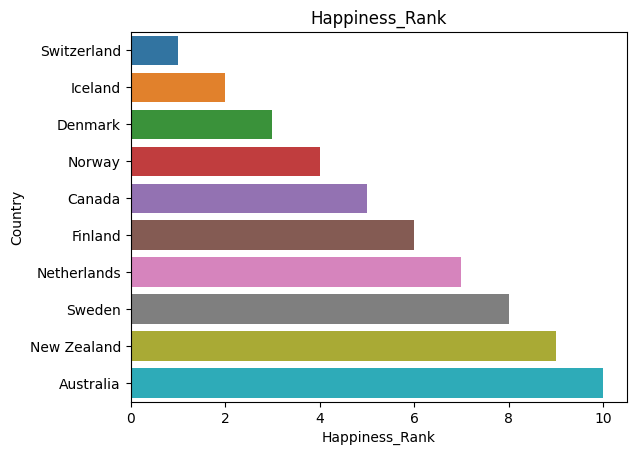

-----------------------------------
       Happiness_Score     ratio
5.192                2  1.265823
7.587                1  0.632911
4.686                1  0.632911
4.839                1  0.632911
4.800                1  0.632911
...                ...       ...
5.855                1  0.632911
5.848                1  0.632911
5.833                1  0.632911
5.828                1  0.632911
2.839                1  0.632911

[157 rows x 2 columns]


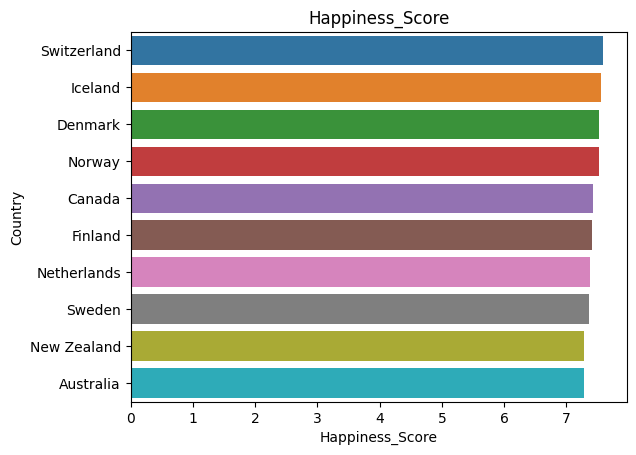

-----------------------------------
         Standard_Error     ratio
0.03780               2  1.265823
0.03751               2  1.265823
0.04394               2  1.265823
0.05051               2  1.265823
0.04934               2  1.265823
...                 ...       ...
0.04114               1  0.632911
0.04251               1  0.632911
0.03843               1  0.632911
0.05371               1  0.632911
0.06727               1  0.632911

[153 rows x 2 columns]


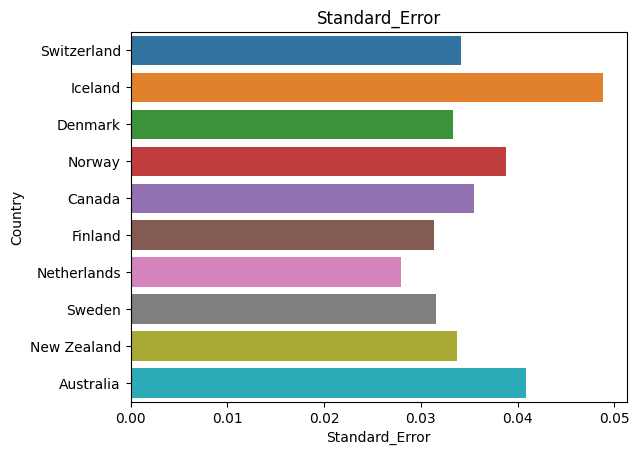

-----------------------------------
         Economy_(GDP_per_Capita)     ratio
1.39651                         1  0.632911
0.39753                         1  0.632911
1.15406                         1  0.632911
1.02564                         1  0.632911
1.12094                         1  0.632911
...                           ...       ...
1.12254                         1  0.632911
1.18498                         1  0.632911
1.14723                         1  0.632911
0.59325                         1  0.632911
0.20868                         1  0.632911

[158 rows x 2 columns]


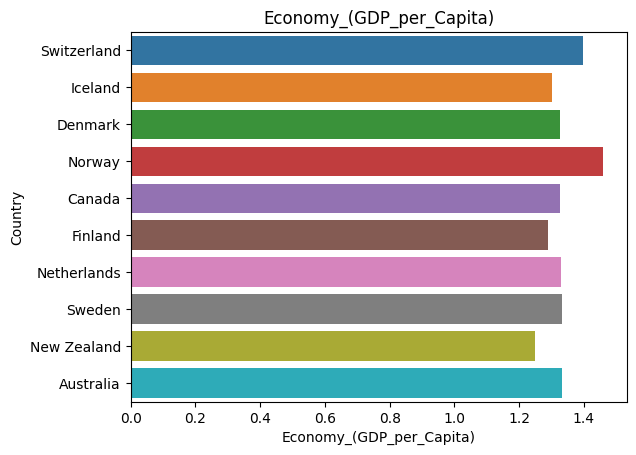

-----------------------------------
         Family     ratio
1.34951       1  0.632911
0.43106       1  0.632911
0.92933       1  0.632911
0.80001       1  0.632911
1.20215       1  0.632911
...         ...       ...
1.12241       1  0.632911
1.27385       1  0.632911
1.25745       1  0.632911
1.14184       1  0.632911
0.13995       1  0.632911

[158 rows x 2 columns]


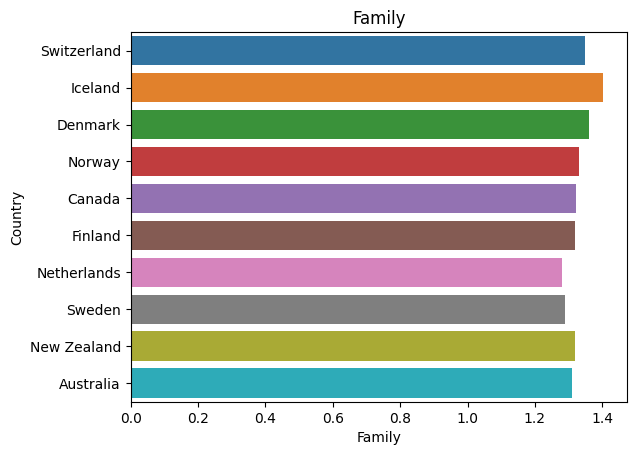

-----------------------------------
         Health_(Life_Expectancy)     ratio
0.92356                         2  1.265823
0.94143                         1  0.632911
0.60268                         1  0.632911
0.88213                         1  0.632911
0.83947                         1  0.632911
...                           ...       ...
0.66098                         1  0.632911
0.64368                         1  0.632911
0.87337                         1  0.632911
0.73128                         1  0.632911
0.28443                         1  0.632911

[157 rows x 2 columns]


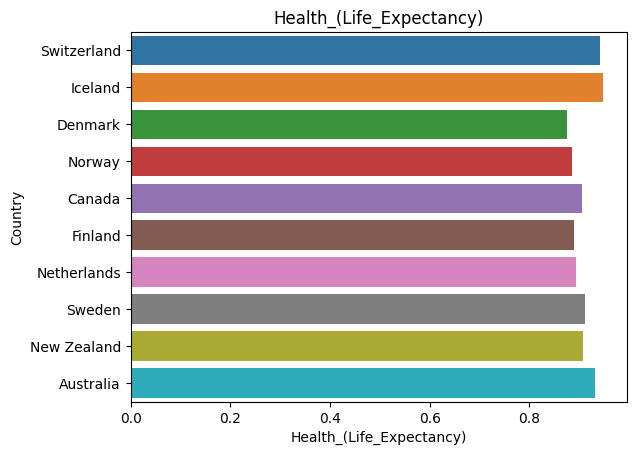

-----------------------------------
         Freedom     ratio
0.66557        1  0.632911
0.40820        1  0.632911
0.07699        1  0.632911
0.33916        1  0.632911
0.32112        1  0.632911
...          ...       ...
0.51649        1  0.632911
0.60855        1  0.632911
0.21342        1  0.632911
0.55475        1  0.632911
0.36453        1  0.632911

[158 rows x 2 columns]


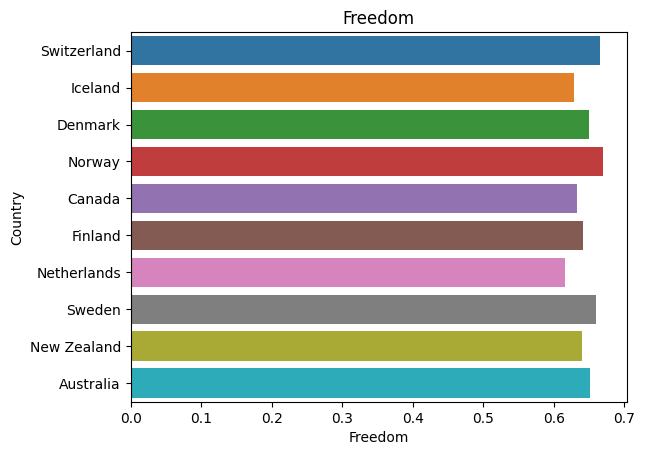

-----------------------------------
         Trust_(Government_Corruption)     ratio
0.32524                              2  1.265823
0.07625                              1  0.632911
0.01397                              1  0.632911
0.04582                              1  0.632911
0.02758                              1  0.632911
...                                ...       ...
0.03787                              1  0.632911
0.01031                              1  0.632911
0.19317                              1  0.632911
0.05989                              1  0.632911
0.10731                              1  0.632911

[157 rows x 2 columns]


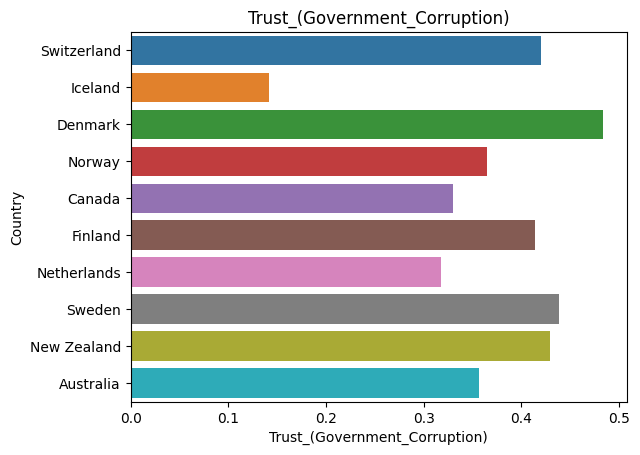

-----------------------------------
         Generosity     ratio
0.29678           1  0.632911
0.21222           1  0.632911
0.00000           1  0.632911
0.21854           1  0.632911
0.12800           1  0.632911
...             ...       ...
0.11827           1  0.632911
0.25328           1  0.632911
0.02641           1  0.632911
0.27815           1  0.632911
0.16681           1  0.632911

[158 rows x 2 columns]


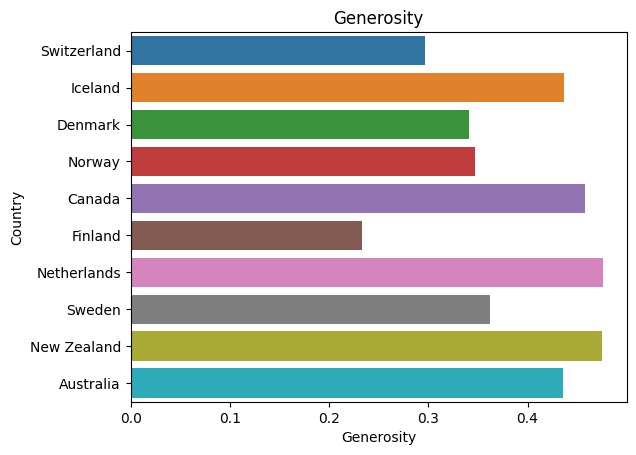

-----------------------------------
         Dystopia_Residual     ratio
2.51738                  1  0.632911
2.51767                  1  0.632911
1.80101                  1  0.632911
1.57059                  1  0.632911
1.24074                  1  0.632911
...                    ...       ...
2.24729                  1  0.632911
1.61583                  1  0.632911
2.44649                  1  0.632911
2.32407                  1  0.632911
1.56726                  1  0.632911

[158 rows x 2 columns]


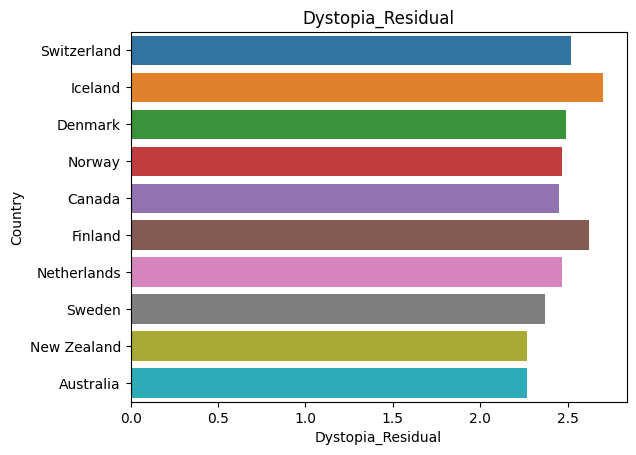

In [127]:
df2=df.iloc[0:10,0]
df1=df.drop(['Country','Region'],axis=1)
for i in df1.columns:
    if len(df[i].unique())>9:
        print('-------'*5)
        print(pd.DataFrame({i: df1[i].value_counts(),'ratio':(100*df[i].value_counts())/len(df)}))
        a=sns.barplot(y=df2,x=i,data=df.iloc[0:10,2:12])
        a.set_title(i)
        plt.show()

In [73]:
df.iloc[0:10,:]

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [147]:
dfb = b
dfc = c
dfb.columns = dfb.columns.str.replace(' ','_')
dfc.columns = dfc.columns.str.replace('.','_')

C:\Users\alpyk\AppData\Local\Temp\ipykernel_2888\934789590.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfc.columns = dfc.columns.str.replace('.','_')


In [148]:
dfc.head()

,Country,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy__GDP_per_Capita_,Family,Health__Life_Expectancy_,Freedom,Generosity,Trust__Government_Corruption_,Dystopia_Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [133]:
comp = pd.DataFrame()

In [216]:
comp['2015SCORE'] = df['Happiness_Score']
comp['2016SCORE'] = dfb['Happiness_Score']
comp['2017SCORE'] = dfc['Happiness_Score']
comp['2016-2015'] = comp['2016SCORE'] - comp['2015SCORE']
comp['2017-2016'] = comp['2017SCORE'] - comp['2016SCORE']
comp['2017-2015'] = round(comp['2017SCORE'] - comp['2015SCORE'],3)

In [217]:
comp.head(10)

,2015,2016,2017,2015SCORE,2016SCORE,2017SCORE,2016-2015,2017-2016,2017-2015
0,Switzerland,Denmark,Norway,7.587,7.526,7.537,-0.061,0.011,-0.050
1,Iceland,Switzerland,Denmark,7.561,7.509,7.522,-0.052,0.013,-0.039
2,Denmark,Iceland,Iceland,7.527,7.501,7.504,-0.026,0.003,-0.023
3,Norway,Norway,Switzerland,7.522,7.498,7.494,-0.024,-0.004,-0.028
4,Canada,Finland,Finland,7.427,7.413,7.469,-0.014,0.056,0.042
5,Finland,Canada,Netherlands,7.406,7.404,7.377,-0.002,-0.027,-0.029
6,Netherlands,Netherlands,Canada,7.378,7.339,7.316,-0.039,-0.023,-0.062
7,Sweden,New Zealand,New Zealand,7.364,7.334,7.314,-0.030,-0.020,-0.050
8,New Zealand,Australia,Sweden,7.286,7.313,7.284,0.027,-0.029,-0.002
9,Australia,Sweden,Australia,7.284,7.291,7.284,0.007,-0.007,-0.000


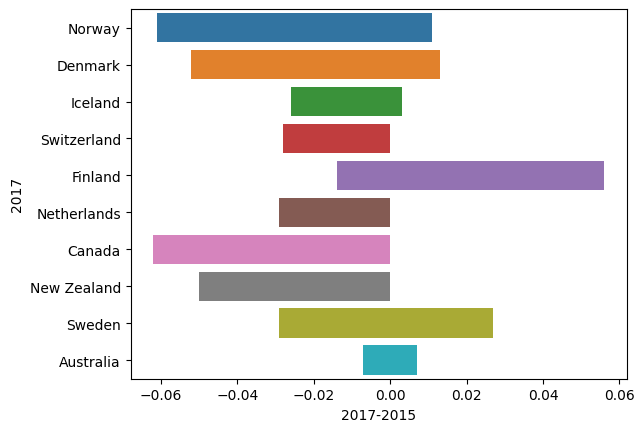

In [219]:
sns.barplot(x='2016-2015',y='2016',data=comp.iloc[0:10,:])
sns.barplot(x='2017-2016',y='2016',data=comp.iloc[0:10,:])
sns.barplot(x='2017-2015',y='2017',data=comp.iloc[0:10,:])
plt.show()



In [192]:
comp.describe().T

,count,mean,std,min,25%,50%,75%,max
2015SCORE,158.0,5.375734,1.145010,2.839,4.5260,5.2325,6.24375,7.587
2016SCORE,157.0,5.382185,1.141674,2.905,4.4040,5.3140,6.26900,7.526
2017SCORE,155.0,5.354019,1.131230,2.693,4.5055,5.2790,6.10150,7.537
2016-2015,157.0,-0.009707,0.079462,-0.183,-0.0740,-0.0070,0.05300,0.162
2017-2016,155.0,-0.059071,0.082549,-0.610,-0.0975,-0.0490,-0.01800,0.082
2017-2015,155.0,-0.069310,0.113198,-0.647,-0.1425,-0.0630,-0.00100,0.162


In [172]:
comp['2017-2016'].min()

-0.60999992179871

In [185]:
comp[comp['2017-2016']<-0.60]

,2015,2016,2017,2015SCORE,2016SCORE,2017SCORE,2016-2015,2017-2016
154,Benin,Togo,Central African Republic,3.34,3.303,2.693,-0.037,-0.61


In [194]:
comp

,2015,2016,2017,2015SCORE,2016SCORE,2017SCORE,2016-2015,2017-2016,2017-2015
0,Switzerland,Denmark,Norway,7.587,7.526,7.537,-0.061,0.011,-0.050
1,Iceland,Switzerland,Denmark,7.561,7.509,7.522,-0.052,0.013,-0.039
2,Denmark,Iceland,Iceland,7.527,7.501,7.504,-0.026,0.003,-0.023
3,Norway,Norway,Switzerland,7.522,7.498,7.494,-0.024,-0.004,-0.028
4,Canada,Finland,Finland,7.427,7.413,7.469,-0.014,0.056,0.042
...,...,...,...,...,...,...,...,...,...
153,Rwanda,Afghanistan,Burundi,3.465,3.360,2.905,-0.105,-0.455,-0.560
154,Benin,Togo,Central African Republic,3.340,3.303,2.693,-0.037,-0.610,-0.647
155,Syria,Syria,NaN,3.006,3.069,NaN,0.063,NaN,NaN
156,Burundi,Burundi,NaN,2.905,2.905,NaN,0.000,NaN,NaN
